### Generate the tuning hyperparameters
In order to fairly evaluate the algorithms, the hyperparameters need to be tuned.
I use random tuning.
This script outputs a text file for hyperparameters.
Each line of the text file can be passed as a command line argument to `run_experiment.py`

In [160]:
# imports
import numpy as np
import pandas as pd
import random
import os
import re
import ast
import pickle
import matplotlib.pyplot as plt

In [167]:
# define hyperparameters and sampling ranges
random.seed(42)

# things to hit
_agent=["DQN","UADQN"]
_action_selection=["softmax", "egreedy"]
_seed = [1]
_n_episodes = [100]

# things to sample from
_lr = [1e-1, 7e-2, 3e-2, 1e-2, 7e-3, 3e-3, 1e-3, 7e-4, 3e-4, 1e-4, 7e-5, 3e-5, 1e-5]
_batch_size = [1, 2, 4, 8, 16, 32, 64, 128, 256]
_adam_epsilon = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
_update_target = [4, 8, 16, 32]
_epsilon_final = [0.1, 0.08, 0.06, 0.04, 0.03, 0.02, 0.01]

# generate samples
result = ""
#DQN
for action_selection in _action_selection:
    for n_episodes in _n_episodes:
        for _ in range(200):
            for seed in _seed:
                line = '--agent=DQN '
                line += '--action_selection='+action_selection+ ' '
                line += '--n_episodes='+str(n_episodes) + " "

                line += '--lr='+str(random.sample(_lr,1)[0]) + " "
                line += '--batch_size='+str(random.sample(_batch_size,1)[0]) + " "
                line += '--adam_epsilon='+str(random.sample(_adam_epsilon,1)[0]) + " "
                line += '--update_target='+str(random.sample(_update_target,1)[0]) + " "
                if action_selection=="egreedy":
                    line += '--epsilon_final='+str(random.sample(_epsilon_final,1)[0]) + " "


                result += line + '--seed='+str(seed) + "\n"
# UADQN
for n_episodes in _n_episodes:
    for _ in range(100):
        for seed in _seed:
            line = '--agent=UADQN '
            line += '--n_episodes='+str(50) + " "

            line += '--lr='+str(random.sample(_lr,1)[0]) + " "
            line += '--batch_size='+str(random.sample(_batch_size,1)[0]) + " "
            line += '--adam_epsilon='+str(random.sample(_adam_epsilon,1)[0]) + " "
            line += '--update_target='+str(random.sample(_update_target,1)[0]) + " "


            result += line + '--seed='+str(seed) + "\n"

# write text file

with open("tuning.txt", "w") as f:
    f.write(result)

### Evaluate Tuning Results
After the tuning runs, the results are stored in the `results` folder.
I read them in and generate files `tuned_hyperparameters_DQN_softmax.txt`, `tuned_hyperparameters_DQN_egreedy.txt`, `tuned_hyperparameters_UADQN.txt` with the optimal hyperparameter values for the three algorithms.

In [182]:
tuning_results="../../results/"
# read results
run_folders = [tuning_results+s for s in os.listdir(tuning_results) if s.startswith("2022")] 

params = []
episode_scores = []
for run_folder in run_folders:
    with open(run_folder+"/experimental-setup", "r") as setup:
        setup_dict = ast.literal_eval(setup.read())
        setup_dict["agent"] = "UADQN" if re.search(r"UADQN", run_folder) else "DQN"
        params.append(setup_dict)
    try:
        with open(run_folder+"/log_data.pkl", "rb") as scores:
            episode_scores.append([score for score, ts in pickle.load(scores)["Episode_score"]])
    except FileNotFoundError:
        episode_scores.append("")

In [186]:
# generate dataframes:
setups = pd.DataFrame(params)
scores = pd.DataFrame(episode_scores)
#plt.plot(scores, alpha = 0.1, color="blue")
setups


,Notes,action_selection,adam_epsilon,env,final_exploration_rate,final_exploration_step,gamma,initial_exploration_rate,learning_rate,loss,...,train_steps,update_frequency,update_target_frequency,weight_scale,agent,aleatoric_factor,biased_aleatoric,epistemic_factor,n_quantiles,noise_scale
0,"This is a tuning run, executed on a single bui...",softmax,1.000000e-09,<NormalizeObservation<OneHotHour<DiscreteSingl...,0.02,1000.0,0.99,1.0,0.01000,mse,...,876000,1,32,1.414214,DQN,NaN,NaN,NaN,NaN,NaN
1,"This is a tuning run, executed on a single bui...",softmax,1.000000e-09,<NormalizeObservation<OneHotHour<DiscreteSingl...,0.02,1000.0,0.99,1.0,0.01000,mse,...,876000,1,8,1.414214,DQN,NaN,NaN,NaN,NaN,NaN
2,"This is a tuning run, executed on a single bui...",softmax,1.000000e-04,<NormalizeObservation<OneHotHour<DiscreteSingl...,0.02,1000.0,0.99,1.0,0.00010,mse,...,876000,1,32,1.414214,DQN,NaN,NaN,NaN,NaN,NaN
3,"This is a tuning run, executed on a single bui...",egreedy,1.000000e-06,<NormalizeObservation<OneHotHour<DiscreteSingl...,0.02,1000.0,0.99,1.0,0.07000,mse,...,876000,1,8,1.414214,DQN,NaN,NaN,NaN,NaN,NaN
4,"This is a tuning run, executed on a single bui...",NaN,1.000000e-06,<NormalizeObservation<OneHotHour<DiscreteSingl...,NaN,NaN,0.99,NaN,0.00003,NaN,...,876000,1,16,1.414214,UADQN,0.0,False,1.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"This is a tuning run, executed on a single bui...",softmax,1.000000e-06,<NormalizeObservation<OneHotHour<DiscreteSingl...,0.02,1000.0,0.99,1.0,0.00300,mse,...,876000,1,8,1.414214,DQN,NaN,NaN,NaN,NaN,NaN
496,"This is a tuning run, executed on a single bui...",NaN,1.000000e-09,<NormalizeObservation<OneHotHour<DiscreteSingl...,NaN,NaN,0.99,NaN,0.00300,NaN,...,876000,1,4,1.414214,UADQN,0.0,False,1.0,20.0,1.0
497,"This is a tuning run, executed on a single bui...",egreedy,1.000000e-04,<NormalizeObservation<OneHotHour<DiscreteSingl...,0.02,1000.0,0.99,1.0,0.00070,mse,...,876000,1,4,1.414214,DQN,NaN,NaN,NaN,NaN,NaN
498,"This is a tuning run, executed on a single bui...",egreedy,1.000000e-03,<NormalizeObservation<OneHotHour<DiscreteSingl...,0.02,1000.0,0.99,1.0,0.01000,mse,...,876000,1,16,1.414214,DQN,NaN,NaN,NaN,NaN,NaN


In [189]:



#dqn-softmax
dqn_softmax_is = setups[setups["agent"] == "DQN"][setups["action_selection"] == "softmax"].index
dqn_softmax_best_i = scores[99][dqn_softmax_is].idxmax()


#dqn-egreedy
dqn_egreedy_is = setups[setups["agent"] == "DQN"][setups["action_selection"] == "egreedy"].index
dqn_egreedy_best_i = scores[99][dqn_egreedy_is].idxmax()


#uadqn
uadqn_is = setups[setups["agent"] == "UADQN"].index
uadqn_best_i = scores[99][uadqn_is].idxmax()



/var/folders/xk/q5r2r6d96n34m06fwvg751s40000gn/T/ipykernel_19378/556038120.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dqn_softmax_is = setups[setups["agent"] == "DQN"][setups["action_selection"] == "softmax"].index
/var/folders/xk/q5r2r6d96n34m06fwvg751s40000gn/T/ipykernel_19378/556038120.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dqn_egreedy_is = setups[setups["agent"] == "DQN"][setups["action_selection"] == "egreedy"].index


In [203]:

print("Best UADQN:", scores[99][uadqn_best_i])
print("Best Softmax DQN:", scores[99][dqn_softmax_best_i])
print("Best egreedy DQN:", scores[99][dqn_egreedy_best_i])

Best UADQN: -677.2765423164528
Best Softmax DQN: -745.6149653090688
Best egreedy DQN: -1113.9991831210937


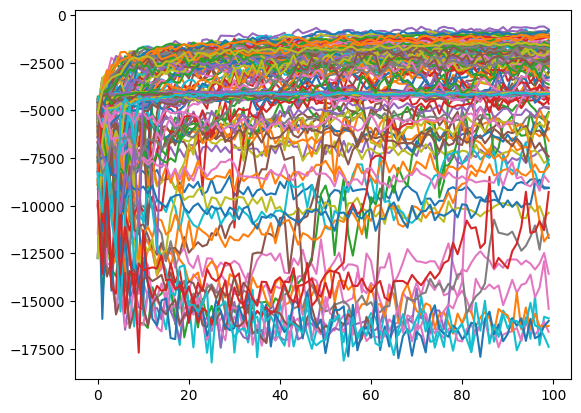

In [211]:
plt.plot(scores.transpose()[dqn_softmax_is])
#plt.plot(scores.transpose()[dqn_egreedy_best_i])
#plt.plot(scores.transpose()[uadqn_best_i])

### Generate Tuning Plots
From the tuning results, some things can be visualized:

For every algorithm:
1. the effect of individual hyperparameters on performance
2. ...
3. ...